# Titanic Passenger Survival Predition
### by Anqi Xue  
  
Kaggle Challenge Link: https://www.kaggle.com/competitions/titanic/data  
The Goal is to predict if a passenger survived the sinking of the Titanic or not.

# Part 0: Environment Setup

In [1]:
# Import numpy, pandas, matplotlib.pyplot and seaborn with our usual aliases.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style to darkgrid
sns.set_style('darkgrid')

# Execute the matplotlib magic function to display plots inline
%matplotlib inline

# Part 1: Data Cleaning and Preprocessing

## 1.1 Data Preparation

This dataset contains details of the Titanic passenger information and the target variable is a binary variable indicating the survival (0 = No, 1 = Yes) of a passenger. 

In [2]:
# Load the train dataset and test dataset

train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
# Set PassengerId as the Index

train_df = train_df.set_index('PassengerId')
test_df = test_df.set_index('PassengerId')

In [6]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 1.2 Data Exploration and Transformation

**Drop Irrelevant Columns**  
Drop the 'Name', 'Ticket', 'Cabin' columns because their information are irrelevant to the target output.

In [8]:
train_df = train_df.drop(columns = ['Name', 'Ticket', 'Cabin'])
test_df = test_df.drop(columns = ['Name', 'Ticket', 'Cabin'])

**Missing Values**  
From the df.info() we can see that there are missing values in the columns 'Age', 'Cabin', 'Embarked' for the train set and missing values in the columns 'Age', 'Fare', 'Cabin' fot the test set. ('Cabin' has already been dropped)

In [9]:
# Deal with missing vlaue in train_df

# Fill the missing values of Age with the median value of Age
train_df.Age = train_df.Age.fillna(train_df.Age.median())

# Drop the entire row for the missing values of Embarked 
train_df = train_df.dropna(axis = 0, how = 'any')

In [10]:
# Deal with missing vlaue in test_df

# Fill the missing values of Age with the median value of Age
test_df.Age = test_df.Age.fillna(test_df.Age.median())

# Fill the missing values of Fare with the median value of Fare
test_df.Fare = test_df.Fare.fillna(test_df.Fare.median())

In [11]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,28.0,1,2,23.4500,S


In [12]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
1305,3,male,27.0,0,0,8.0500,S
1306,1,female,39.0,0,0,108.9000,C
1307,3,male,38.5,0,0,7.2500,S


**One-Hot Encode Categorical Variables**  
'Pclass', 'Sex', 'Embarked' are categorical variables.

In [13]:
# Transform Pclass, Sex and Embarked using One-Hot Encoding

categorical_var = ['Pclass', 'Sex', 'Embarked']
train_df_ohe = pd.get_dummies(train_df, columns=categorical_var, drop_first=True)
test_df_ohe = pd.get_dummies(test_df, columns=categorical_var, drop_first=True)

**Create X and y from the dataframe**  
'Survived' is y (target value). 

In [14]:
X_train_dev = train_df_ohe.drop(columns='Survived')
y_train_dev = train_df_ohe['Survived']

X_test = test_df_ohe

Text(0, 0.5, 'Distribution of target variable')

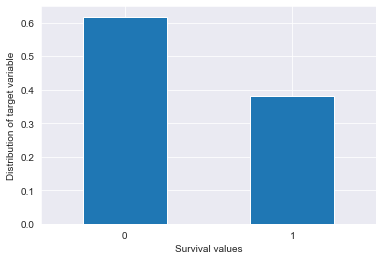

In [15]:
# The distribution of the target variable in the dataset

y_train_dev.value_counts(normalize = True).plot(kind='bar', rot=0)
plt.xlabel('Survival values')
plt.ylabel('Distribution of target variable')

**Standardization**  
Scaling the values using StandardScaler()

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dev)
X_test_scaled = scaler.transform(X_test)

**Split Train Set and Develop Set**

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_dev,y_train,y_dev = train_test_split(X_train_dev, 
                                               y_train_dev,
                                               test_size=0.3,
                                               stratify=y_train_dev,
                                               random_state=512)

# Part 2: Modeling and Training

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV

**1.1 Random Forest**

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters to tune
param_grid = {
    'max_features': ['sqrt', 'log2'],
    'max_depth': [6, 9, 12, 15],
    'n_estimators': [30, 90, 150, 210]
}

# Create a RandomForestClassifier object
rf = RandomForestClassifier(random_state=512)

# Create a GridSearchCV object with 3-fold cross-validation
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=3)

# Fit the GridSearchCV object on the development dataset
grid_search.fit(X_train, y_train)

# # Print the best hyperparameters and the corresponding mean cross-validation score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.3f}")

# Get the best model from grid search
best_model_rf = grid_search.best_estimator_

# Predict on the development dataset
y_pred_rf = best_model_rf.predict(X_dev)

# Calculate the accuracy on the development dataset
dev_accuracy = accuracy_score(y_dev, y_pred_rf)
print(f"Develop accuracy of the best model: {dev_accuracy:.3f}")

Best hyperparameters: {'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 150}
Best cross-validation score: 0.818
Develop accuracy of the best model: 0.839


**1.2 Extreme Gradient Boosting**

In [20]:
from xgboost import XGBClassifier

# Define the hyperparameters to tune
param_grid = {
    'learning_rate': [0.00001, 0.0001, 0.001, 0.01],
    'max_depth': [3, 6, 9, 12],
    'n_estimators': [5, 10, 30, 50]
}

# Create a XGBoostingClassifier object
xgb = XGBClassifier(random_state=512)

# Create a GridSearchCV object with 3-fold cross-validation
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=3)

# Fit the GridSearchCV object on the development dataset
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validation score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.3f}")

# Get the best model from grid search
best_model_xgb = grid_search.best_estimator_

# Predict on the development dataset
y_pred_xgb = best_model_xgb.predict(X_dev)

# Calculate the accuracy on the development dataset
dev_accuracy = accuracy_score(y_dev, y_pred_xgb)
print(f"Develop accuracy of the best model: {dev_accuracy:.3f}")

Best hyperparameters: {'learning_rate': 1e-05, 'max_depth': 9, 'n_estimators': 5}
Best cross-validation score: 0.809
Develop accuracy of the best model: 0.749


**1.3 Stochastic Gradient Decending**

In [21]:
from sklearn.linear_model import SGDClassifier

# Define the hyperparameters to tune
param_grid = {
    'loss':['hinge', 'squared_hinge'] , 
    'alpha':[1e-3, 1e-4, 1e-5]
}

# Create a SGDClassifier object, stochastic gradient descent
SGD = SGDClassifier(random_state=512)

# Fit the GridSearchCV object on the development dataset
grid_search = GridSearchCV(SGD, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validation score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.3f}")

# Get the best model from grid search
best_model_SGD = grid_search.best_estimator_

# Predict on the development dataset
y_pred_SGD = best_model_SGD.predict(X_dev)

# Calculate the accuracy on the development dataset
dev_accuracy = accuracy_score(y_dev, y_pred_SGD)
print(f"Develop accuracy of the best model: {dev_accuracy:.3f}")

Best hyperparameters: {'alpha': 0.001, 'loss': 'hinge'}
Best cross-validation score: 0.725
Develop accuracy of the best model: 0.682


**1.4 Gradient Boosting**

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the hyperparameters to tune
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 6, 9, 12],
    'n_estimators': [10, 30, 50, 100]
}

# Create a GradientBoostingClassifier object
gb = GradientBoostingClassifier(random_state=512)

# Create a GridSearchCV object with 3-fold cross-validation
grid_search = GridSearchCV(gb, param_grid=param_grid, cv=3)

# Fit the GridSearchCV object on the development dataset
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validation score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.3f}")

# Get the best model from grid search
best_model_xgb = grid_search.best_estimator_

# Predict on the development dataset
y_pred_xgb = best_model_xgb.predict(X_dev)

# Calculate the accuracy on the development dataset
dev_accuracy = accuracy_score(y_dev, y_pred_xgb)
print(f"Develop accuracy of the best model: {dev_accuracy:.3f}")

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best cross-validation score: 0.822
Develop accuracy of the best model: 0.820


**1.5 Support Vector Machines**

In [25]:
from sklearn.svm import SVC

# Create an SVC object
svc = SVC(random_state=512)

# Fit the svc object on the training dataset
svc.fit(X_train, y_train)

# Predict on the development dataset
y_pred_svm = svc.predict(X_dev)

# Calculate the accuracy on the development dataset
dev_accuracy = accuracy_score(y_dev, y_pred_svm)
print(f"Develop accuracy of SVM: {dev_accuracy:.3f}")

Develop accuracy of SVM: 0.659


# Part 3: Prediction

After analyzing the resuls, I found that Random Forest has a higher develop accuracy.

In [26]:
# Prediction on test set

y_test_pred_rf = best_model_rf.predict(X_test)

In [38]:
# Create test results dataframe

test_result_df = pd.DataFrame(y_test_pred_rf, columns=['Survived'], index=X_test.index)
test_result_df.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [39]:
# Save results in csv file

test_result_df.to_csv('test_results.csv')